# Logistic Regression with a Neural Network mindset

Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## <font color='darkblue'>Updates</font>
This notebook has been updated over the past few months.  The prior version was named "v5", and the current versionis now named '6a'

#### If you were working on a previous version:
* You can find your prior work by looking in the file directory for the older files (named by version name).
* To view the file directory, click on the "Coursera" icon in the top left corner of this notebook.
* Please copy your work from the older versions to the new version, in order to submit your work for grading.

#### List of Updates
* Forward propagation formula, indexing now starts at 1 instead of 0.
* Optimization function comment now says "print cost every 100 training iterations" instead of "examples".
* Fixed grammar in the comments.
* Y_prediction_test variable name is used consistently.
* Plot's axis label now says "iterations (hundred)" instead of "iterations".
* When testing the model, the test image is normalized by dividing by 255.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [72]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

y = [1], it's a 'cat' picture.


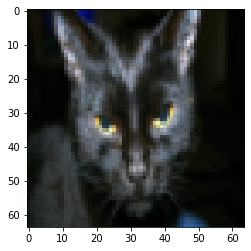

In [73]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [74]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[2]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [75]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [76]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [77]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [78]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0, -100]))))

sigmoid([0, 2]) = [5.00000000e-01 3.72007598e-44]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [79]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim, 1))
    b = 0.
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [80]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [81]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot((w.T), X) + b)                                 # compute activation
    cost = -np.sum(Y*np.log(A) + (1-Y)*np.log(1-A)) / m                               # compute cost
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = np.sum(A-Y)/m
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [82]:
q1a, q1b = propagate(np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]]))
print(q1a)
print(q1b)

{'dw': array([[0.99845601],
       [2.39507239]]), 'db': 0.001455578136784208}
5.801545319394553


### 4.4 - Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [83]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost: # and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [84]:
q2a, q2b, q2c = optimize( np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]]), num_iterations = 1000, learning_rate = 0.009, print_cost = True)
print(q2a)
print(q2b)
print(q2c)

Cost after iteration 0: 5.801545
Cost after iteration 1: 5.740951
Cost after iteration 2: 5.680375
Cost after iteration 3: 5.619822
Cost after iteration 4: 5.559291
Cost after iteration 5: 5.498785
Cost after iteration 6: 5.438306
Cost after iteration 7: 5.377856
Cost after iteration 8: 5.317437
Cost after iteration 9: 5.257052
Cost after iteration 10: 5.196703
Cost after iteration 11: 5.136393
Cost after iteration 12: 5.076126
Cost after iteration 13: 5.015904
Cost after iteration 14: 4.955732
Cost after iteration 15: 4.895612
Cost after iteration 16: 4.835550
Cost after iteration 17: 4.775549
Cost after iteration 18: 4.715614
Cost after iteration 19: 4.655751
Cost after iteration 20: 4.595964
Cost after iteration 21: 4.536260
Cost after iteration 22: 4.476645
Cost after iteration 23: 4.417125
Cost after iteration 24: 4.357707
Cost after iteration 25: 4.298399
Cost after iteration 26: 4.239210
Cost after iteration 27: 4.180147
Cost after iteration 28: 4.121220
Cost after iteration 29:

Cost after iteration 388: 0.357103
Cost after iteration 389: 0.357031
Cost after iteration 390: 0.356959
Cost after iteration 391: 0.356887
Cost after iteration 392: 0.356815
Cost after iteration 393: 0.356743
Cost after iteration 394: 0.356672
Cost after iteration 395: 0.356600
Cost after iteration 396: 0.356528
Cost after iteration 397: 0.356457
Cost after iteration 398: 0.356385
Cost after iteration 399: 0.356313
Cost after iteration 400: 0.356242
Cost after iteration 401: 0.356170
Cost after iteration 402: 0.356098
Cost after iteration 403: 0.356027
Cost after iteration 404: 0.355955
Cost after iteration 405: 0.355884
Cost after iteration 406: 0.355812
Cost after iteration 407: 0.355741
Cost after iteration 408: 0.355670
Cost after iteration 409: 0.355598
Cost after iteration 410: 0.355527
Cost after iteration 411: 0.355456
Cost after iteration 412: 0.355384
Cost after iteration 413: 0.355313
Cost after iteration 414: 0.355242
Cost after iteration 415: 0.355171
Cost after iteration

Cost after iteration 631: 0.340363
Cost after iteration 632: 0.340297
Cost after iteration 633: 0.340231
Cost after iteration 634: 0.340165
Cost after iteration 635: 0.340099
Cost after iteration 636: 0.340033
Cost after iteration 637: 0.339967
Cost after iteration 638: 0.339901
Cost after iteration 639: 0.339835
Cost after iteration 640: 0.339770
Cost after iteration 641: 0.339704
Cost after iteration 642: 0.339638
Cost after iteration 643: 0.339572
Cost after iteration 644: 0.339507
Cost after iteration 645: 0.339441
Cost after iteration 646: 0.339375
Cost after iteration 647: 0.339309
Cost after iteration 648: 0.339244
Cost after iteration 649: 0.339178
Cost after iteration 650: 0.339113
Cost after iteration 651: 0.339047
Cost after iteration 652: 0.338981
Cost after iteration 653: 0.338916
Cost after iteration 654: 0.338850
Cost after iteration 655: 0.338785
Cost after iteration 656: 0.338719
Cost after iteration 657: 0.338654
Cost after iteration 658: 0.338588
Cost after iteration

Cost after iteration 932: 0.321458
Cost after iteration 933: 0.321398
Cost after iteration 934: 0.321338
Cost after iteration 935: 0.321278
Cost after iteration 936: 0.321219
Cost after iteration 937: 0.321159
Cost after iteration 938: 0.321099
Cost after iteration 939: 0.321040
Cost after iteration 940: 0.320980
Cost after iteration 941: 0.320921
Cost after iteration 942: 0.320861
Cost after iteration 943: 0.320801
Cost after iteration 944: 0.320742
Cost after iteration 945: 0.320682
Cost after iteration 946: 0.320623
Cost after iteration 947: 0.320563
Cost after iteration 948: 0.320504
Cost after iteration 949: 0.320445
Cost after iteration 950: 0.320385
Cost after iteration 951: 0.320326
Cost after iteration 952: 0.320266
Cost after iteration 953: 0.320207
Cost after iteration 954: 0.320148
Cost after iteration 955: 0.320088
Cost after iteration 956: 0.320029
Cost after iteration 957: 0.319970
Cost after iteration 958: 0.319910
Cost after iteration 959: 0.319851
Cost after iteration

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [85]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot((w.T), X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0,i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0

        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [86]:
q3a = predict(np.array([[0.112],[0.231]]), -0.3, np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]]))
q3a

array([[1., 1., 0.]])

<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [87]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [88]:
q4a = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)
q4a

Cost after iteration 0: 0.693147
Cost after iteration 1: 0.741029
Cost after iteration 2: 0.753154
Cost after iteration 3: 0.866709
Cost after iteration 4: 0.768564
Cost after iteration 5: 0.897014
Cost after iteration 6: 0.755613
Cost after iteration 7: 0.880437
Cost after iteration 8: 0.751485
Cost after iteration 9: 0.877133
Cost after iteration 10: 0.744940
Cost after iteration 11: 0.869479
Cost after iteration 12: 0.739538
Cost after iteration 13: 0.863181
Cost after iteration 14: 0.734114
Cost after iteration 15: 0.856499
Cost after iteration 16: 0.728988
Cost after iteration 17: 0.849995
Cost after iteration 18: 0.724030
Cost after iteration 19: 0.843519
Cost after iteration 20: 0.719249
Cost after iteration 21: 0.837130
Cost after iteration 22: 0.714618
Cost after iteration 23: 0.830820
Cost after iteration 24: 0.710124
Cost after iteration 25: 0.824597
Cost after iteration 26: 0.705753
Cost after iteration 27: 0.818463
Cost after iteration 28: 0.701493
Cost after iteration 29:

Cost after iteration 242: 0.425291
Cost after iteration 243: 0.431572
Cost after iteration 244: 0.423411
Cost after iteration 245: 0.429361
Cost after iteration 246: 0.421541
Cost after iteration 247: 0.427170
Cost after iteration 248: 0.419681
Cost after iteration 249: 0.424997
Cost after iteration 250: 0.417832
Cost after iteration 251: 0.422844
Cost after iteration 252: 0.415993
Cost after iteration 253: 0.420710
Cost after iteration 254: 0.414165
Cost after iteration 255: 0.418595
Cost after iteration 256: 0.412349
Cost after iteration 257: 0.416501
Cost after iteration 258: 0.410544
Cost after iteration 259: 0.414426
Cost after iteration 260: 0.408750
Cost after iteration 261: 0.412372
Cost after iteration 262: 0.406969
Cost after iteration 263: 0.410339
Cost after iteration 264: 0.405199
Cost after iteration 265: 0.408327
Cost after iteration 266: 0.403443
Cost after iteration 267: 0.406336
Cost after iteration 268: 0.401699
Cost after iteration 269: 0.404366
Cost after iteration

Cost after iteration 485: 0.307158
Cost after iteration 486: 0.306895
Cost after iteration 487: 0.306633
Cost after iteration 488: 0.306372
Cost after iteration 489: 0.306111
Cost after iteration 490: 0.305851
Cost after iteration 491: 0.305591
Cost after iteration 492: 0.305331
Cost after iteration 493: 0.305072
Cost after iteration 494: 0.304814
Cost after iteration 495: 0.304556
Cost after iteration 496: 0.304298
Cost after iteration 497: 0.304041
Cost after iteration 498: 0.303785
Cost after iteration 499: 0.303529
Cost after iteration 500: 0.303273
Cost after iteration 501: 0.303018
Cost after iteration 502: 0.302763
Cost after iteration 503: 0.302509
Cost after iteration 504: 0.302255
Cost after iteration 505: 0.302002
Cost after iteration 506: 0.301749
Cost after iteration 507: 0.301497
Cost after iteration 508: 0.301245
Cost after iteration 509: 0.300994
Cost after iteration 510: 0.300743
Cost after iteration 511: 0.300492
Cost after iteration 512: 0.300242
Cost after iteration

Cost after iteration 729: 0.254830
Cost after iteration 730: 0.254654
Cost after iteration 731: 0.254479
Cost after iteration 732: 0.254303
Cost after iteration 733: 0.254128
Cost after iteration 734: 0.253953
Cost after iteration 735: 0.253779
Cost after iteration 736: 0.253604
Cost after iteration 737: 0.253430
Cost after iteration 738: 0.253257
Cost after iteration 739: 0.253083
Cost after iteration 740: 0.252910
Cost after iteration 741: 0.252736
Cost after iteration 742: 0.252564
Cost after iteration 743: 0.252391
Cost after iteration 744: 0.252219
Cost after iteration 745: 0.252047
Cost after iteration 746: 0.251875
Cost after iteration 747: 0.251703
Cost after iteration 748: 0.251532
Cost after iteration 749: 0.251361
Cost after iteration 750: 0.251190
Cost after iteration 751: 0.251019
Cost after iteration 752: 0.250849
Cost after iteration 753: 0.250678
Cost after iteration 754: 0.250508
Cost after iteration 755: 0.250339
Cost after iteration 756: 0.250169
Cost after iteration

Cost after iteration 967: 0.218998
Cost after iteration 968: 0.218869
Cost after iteration 969: 0.218740
Cost after iteration 970: 0.218611
Cost after iteration 971: 0.218482
Cost after iteration 972: 0.218354
Cost after iteration 973: 0.218226
Cost after iteration 974: 0.218098
Cost after iteration 975: 0.217970
Cost after iteration 976: 0.217842
Cost after iteration 977: 0.217714
Cost after iteration 978: 0.217587
Cost after iteration 979: 0.217460
Cost after iteration 980: 0.217332
Cost after iteration 981: 0.217205
Cost after iteration 982: 0.217078
Cost after iteration 983: 0.216952
Cost after iteration 984: 0.216825
Cost after iteration 985: 0.216699
Cost after iteration 986: 0.216572
Cost after iteration 987: 0.216446
Cost after iteration 988: 0.216320
Cost after iteration 989: 0.216194
Cost after iteration 990: 0.216069
Cost after iteration 991: 0.215943
Cost after iteration 992: 0.215818
Cost after iteration 993: 0.215692
Cost after iteration 994: 0.215567
Cost after iteration

Cost after iteration 1209: 0.191649
Cost after iteration 1210: 0.191550
Cost after iteration 1211: 0.191451
Cost after iteration 1212: 0.191352
Cost after iteration 1213: 0.191253
Cost after iteration 1214: 0.191155
Cost after iteration 1215: 0.191056
Cost after iteration 1216: 0.190958
Cost after iteration 1217: 0.190860
Cost after iteration 1218: 0.190762
Cost after iteration 1219: 0.190663
Cost after iteration 1220: 0.190565
Cost after iteration 1221: 0.190468
Cost after iteration 1222: 0.190370
Cost after iteration 1223: 0.190272
Cost after iteration 1224: 0.190174
Cost after iteration 1225: 0.190077
Cost after iteration 1226: 0.189980
Cost after iteration 1227: 0.189882
Cost after iteration 1228: 0.189785
Cost after iteration 1229: 0.189688
Cost after iteration 1230: 0.189591
Cost after iteration 1231: 0.189494
Cost after iteration 1232: 0.189397
Cost after iteration 1233: 0.189300
Cost after iteration 1234: 0.189204
Cost after iteration 1235: 0.189107
Cost after iteration 1236: 0

Cost after iteration 1444: 0.170845
Cost after iteration 1445: 0.170766
Cost after iteration 1446: 0.170687
Cost after iteration 1447: 0.170608
Cost after iteration 1448: 0.170529
Cost after iteration 1449: 0.170451
Cost after iteration 1450: 0.170372
Cost after iteration 1451: 0.170293
Cost after iteration 1452: 0.170214
Cost after iteration 1453: 0.170136
Cost after iteration 1454: 0.170057
Cost after iteration 1455: 0.169979
Cost after iteration 1456: 0.169901
Cost after iteration 1457: 0.169822
Cost after iteration 1458: 0.169744
Cost after iteration 1459: 0.169666
Cost after iteration 1460: 0.169588
Cost after iteration 1461: 0.169510
Cost after iteration 1462: 0.169432
Cost after iteration 1463: 0.169354
Cost after iteration 1464: 0.169276
Cost after iteration 1465: 0.169199
Cost after iteration 1466: 0.169121
Cost after iteration 1467: 0.169043
Cost after iteration 1468: 0.168966
Cost after iteration 1469: 0.168889
Cost after iteration 1470: 0.168811
Cost after iteration 1471: 0

Cost after iteration 1676: 0.154211
Cost after iteration 1677: 0.154146
Cost after iteration 1678: 0.154081
Cost after iteration 1679: 0.154017
Cost after iteration 1680: 0.153952
Cost after iteration 1681: 0.153887
Cost after iteration 1682: 0.153822
Cost after iteration 1683: 0.153758
Cost after iteration 1684: 0.153693
Cost after iteration 1685: 0.153629
Cost after iteration 1686: 0.153564
Cost after iteration 1687: 0.153500
Cost after iteration 1688: 0.153436
Cost after iteration 1689: 0.153371
Cost after iteration 1690: 0.153307
Cost after iteration 1691: 0.153243
Cost after iteration 1692: 0.153179
Cost after iteration 1693: 0.153115
Cost after iteration 1694: 0.153050
Cost after iteration 1695: 0.152987
Cost after iteration 1696: 0.152923
Cost after iteration 1697: 0.152859
Cost after iteration 1698: 0.152795
Cost after iteration 1699: 0.152731
Cost after iteration 1700: 0.152667
Cost after iteration 1701: 0.152604
Cost after iteration 1702: 0.152540
Cost after iteration 1703: 0

Cost after iteration 1905: 0.140600
Cost after iteration 1906: 0.140545
Cost after iteration 1907: 0.140491
Cost after iteration 1908: 0.140437
Cost after iteration 1909: 0.140382
Cost after iteration 1910: 0.140328
Cost after iteration 1911: 0.140274
Cost after iteration 1912: 0.140220
Cost after iteration 1913: 0.140166
Cost after iteration 1914: 0.140112
Cost after iteration 1915: 0.140058
Cost after iteration 1916: 0.140004
Cost after iteration 1917: 0.139950
Cost after iteration 1918: 0.139896
Cost after iteration 1919: 0.139842
Cost after iteration 1920: 0.139788
Cost after iteration 1921: 0.139734
Cost after iteration 1922: 0.139681
Cost after iteration 1923: 0.139627
Cost after iteration 1924: 0.139573
Cost after iteration 1925: 0.139520
Cost after iteration 1926: 0.139466
Cost after iteration 1927: 0.139413
Cost after iteration 1928: 0.139359
Cost after iteration 1929: 0.139306
Cost after iteration 1930: 0.139252
Cost after iteration 1931: 0.139199
Cost after iteration 1932: 0

{'costs': [0.6931471805599453,
  0.5845083636993087,
  0.4669490409465547,
  0.37600686694802077,
  0.33146328932825125,
  0.30327306747438293,
  0.27987958658260487,
  0.2600421369258757,
  0.2429406846779662,
  0.2280042225672607,
  0.2148195137844964,
  0.20307819060644985,
  0.19254427716706868,
  0.18303333796883509,
  0.17439859438448874,
  0.1665213970540033,
  0.15930451829756614,
  0.15266732471296504,
  0.14654223503982342,
  0.1408720757031016],
 'Y_prediction_test': array([[1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
         0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0.]]),
 'Y_prediction_train': array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 1., 0., 0., 0., 1., 0

y = 1, you predicted that it is a "cat" picture.


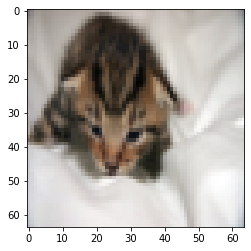

In [89]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(q4a["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

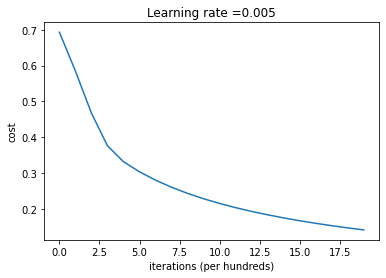

In [90]:
# Plot learning curve (with costs)
costs = np.squeeze(q4a['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(q4a["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



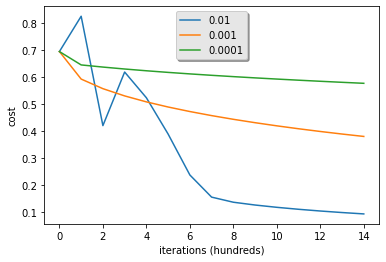

In [91]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

C:\Users\arshk\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
C:\Users\arshk\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


y = 0.0, your algorithm predicts a "non-cat" picture.


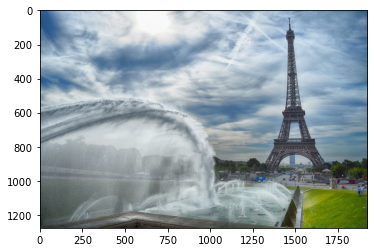

In [92]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(q4a["w"], q4a["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c